In [232]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [233]:
df_profit_state = pd.read_csv('data/quarterly/profit.csv', index_col=0)
df_profit_private = pd.read_csv('data/quarterly/private_profit.csv', index_col=0)
df_assets_state = pd.read_csv('data/quarterly/total_assets.csv', index_col=0)
df_assets_private = pd.read_csv('data/quarterly/private_total_assets.csv', index_col=0)
df_equity_state = pd.read_csv('data/quarterly/total_equity_capital.csv', index_col=0)
df_equity_private = pd.read_csv('data/quarterly/private_equity_capital.csv', index_col=0)

In [234]:
numeric_cols = df_profit_state.select_dtypes(include=np.number).columns.tolist()
df_profit_state['profit_state'] = (df_profit_state[numeric_cols].sum(axis=1) - df_profit_state['privatbank']) / 5

numeric_cols_2 = df_profit_private.select_dtypes(include=np.number).columns.tolist()
df_profit_private['profit_private'] = df_profit_private[numeric_cols_2].sum(axis=1) / 13

numeric_cols = df_assets_state.select_dtypes(include=np.number).columns.tolist()
df_assets_state['assets_state'] = (df_assets_state[numeric_cols].sum(axis=1) - df_assets_state['privatbank']) / 5

numeric_cols_2 = df_assets_private.select_dtypes(include=np.number).columns.tolist()
df_assets_private['assets_private'] = df_assets_private[numeric_cols_2].sum(axis=1) / 13

df_profit = pd.DataFrame({
    'state': df_profit_state['profit_state'],
    'private': df_profit_private['profit_private'],
    'privatbank': df_profit_state['privatbank']
})
df_assets = pd.DataFrame({
    'state': df_assets_state['assets_state'],
    'private': df_assets_private['assets_private'],
    'privatbank': df_assets_state['privatbank']
})

df_roa = (df_profit / df_assets) * 100

start_date = '2023-01-01'
end_date = '2023-12-31'

df_roa = df_roa.loc[start_date:end_date]

print(df_roa['state'].mean())
print(df_roa['private'].mean())
print(df_roa['privatbank'].mean())

0.14355444973898834
0.2367230351648258
0.4207289928404225


<AxesSubplot: xlabel='date'>

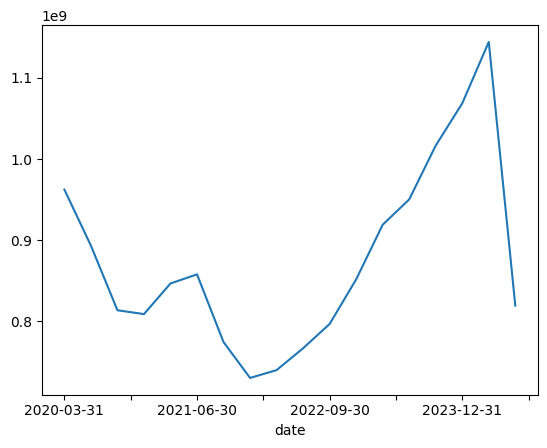

In [235]:
df_assets_state['oschadbank'].plot(kind='line')

In [236]:
numeric_cols = df_equity_state.select_dtypes(include=np.number).columns.tolist()
df_equity_state['equity_state'] = (df_equity_state[numeric_cols].sum(axis=1) - df_equity_state['privatbank']) / 5

numeric_cols_2 = df_equity_private.select_dtypes(include=np.number).columns.tolist()
df_equity_private['equity_private'] = df_equity_private[numeric_cols_2].sum(axis=1) / 13

df_equity = pd.DataFrame({
    'state': df_equity_state['equity_state'],
    'private': df_equity_private['equity_private'],
    'privatbank': df_equity_state['privatbank']
})

df_roe = (df_profit / df_equity) * 100
start_date = '2023-01-01'
end_date = '2023-12-31'

df_roe = df_roe.loc[start_date:end_date]
print(df_roe)
print(df_roe['state'].mean())
print(df_roe['private'].mean())
print(df_roe['privatbank'].mean())

               state   private  privatbank
date                                      
2023-03-31  4.751411  3.450732    7.917008
2023-06-30  5.012814  3.239682    7.355903
2023-09-30  6.812731  3.918506    5.746120
2023-12-31 -6.350433 -1.743553   -2.081646
2.5566307773656485
2.216341809669856
4.734346268816273


In [237]:
df_profit_combined = pd.concat([df_profit_state, df_profit_private], axis=1)
df_equity_combined = pd.concat([df_equity_state, df_equity_private], axis=1)
df_assets_combined = pd.concat([df_assets_state, df_assets_private], axis=1)

In [238]:
numeric_cols = ['privatbank', 'oschadbank', 'ukreximbank', 'ukrgasbank', 'sense', 'first investment bank', 'raiffeisen', 'fuib', 'ukrsibbank', 'universal', 'agricole', 'otp', 'citibank', 'pivdenny', 'kredobank', 'procredit', 'tascombank', 'ing', 'a - bank']
df_profit_combined['profit_combined'] = df_profit_combined[numeric_cols].sum(axis=1) / 19
df_assets_combined['assets_combined'] = df_assets_combined[numeric_cols].sum(axis=1) / 19

df_roa_total = (df_profit_combined['profit_combined'] / df_assets_combined['assets_combined']) * 100

In [239]:
df_equity_combined['equity_combined'] = df_equity_combined[numeric_cols_2].sum(axis=1) / 19

df_roe_total = (df_profit_combined['profit_combined'] / df_equity_combined['equity_combined']) * 100

In [240]:
df_roa_privatbank = (df_profit_combined['privatbank'] / df_assets_combined['privatbank']) * 100
df_roa_oschadbank = (df_profit_combined['oschadbank'] / df_assets_combined['oschadbank']) * 100
df_roa_ukreximbank = (df_profit_combined['ukreximbank'] / df_assets_combined['ukreximbank']) * 100
df_roa_ukrgasbank = (df_profit_combined['ukrgasbank'] / df_assets_combined['ukrgasbank']) * 100
df_roa_sense = (df_profit_combined['sense'] / df_assets_combined['sense']) * 100
df_roa_first_investment_bank = (df_profit_combined['first investment bank'] / df_assets_combined['first investment bank']) * 100

In [241]:
def create_hist_roa(bank, df, total_df):
    plt.figure(figsize=(12, 6))
    plt.bar(pd.to_datetime(df.keys()), df.values, width=20, align='center', color='#003049', alpha=0.7, label='Показник ROA для даного банку')
    plt.plot(pd.to_datetime(df.keys()), total_df.values, color='#CEAD5F', marker='o', linestyle='-', linewidth=2, markersize=8, label='Середнє ROA на ринку банків')
    plt.xlabel('Дата')
    plt.ylabel('Значення')
    plt.title(f'Показник ROA для банку: {bank}')
    plt.xticks(rotation=45)
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.show()

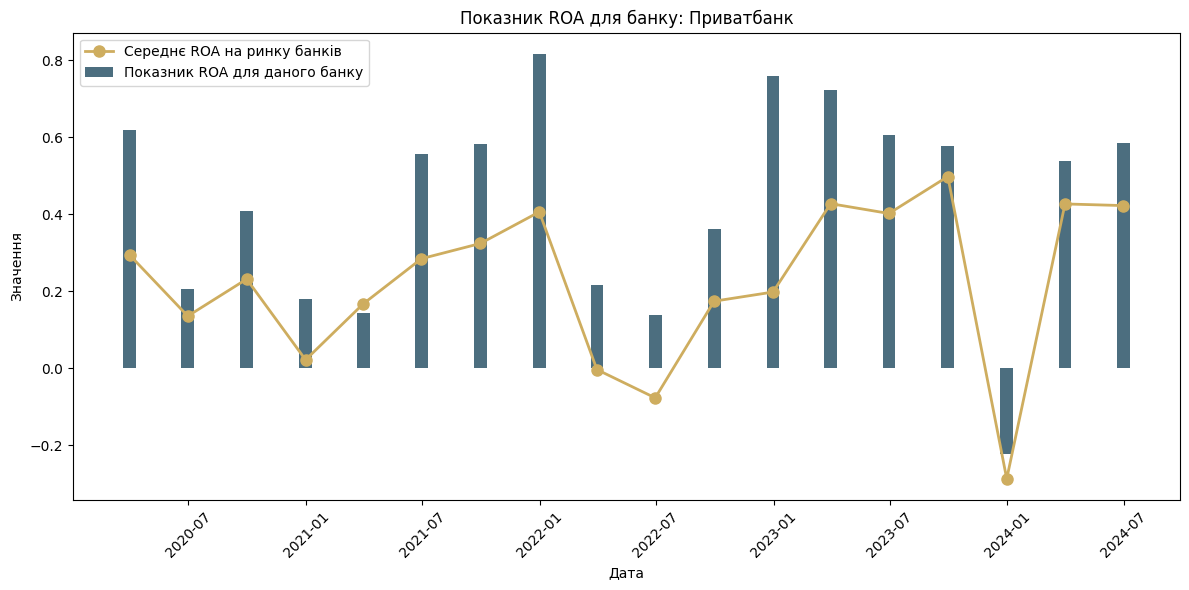

In [242]:
create_hist_roa('Приватбанк', df_roa_privatbank, df_roa_total)

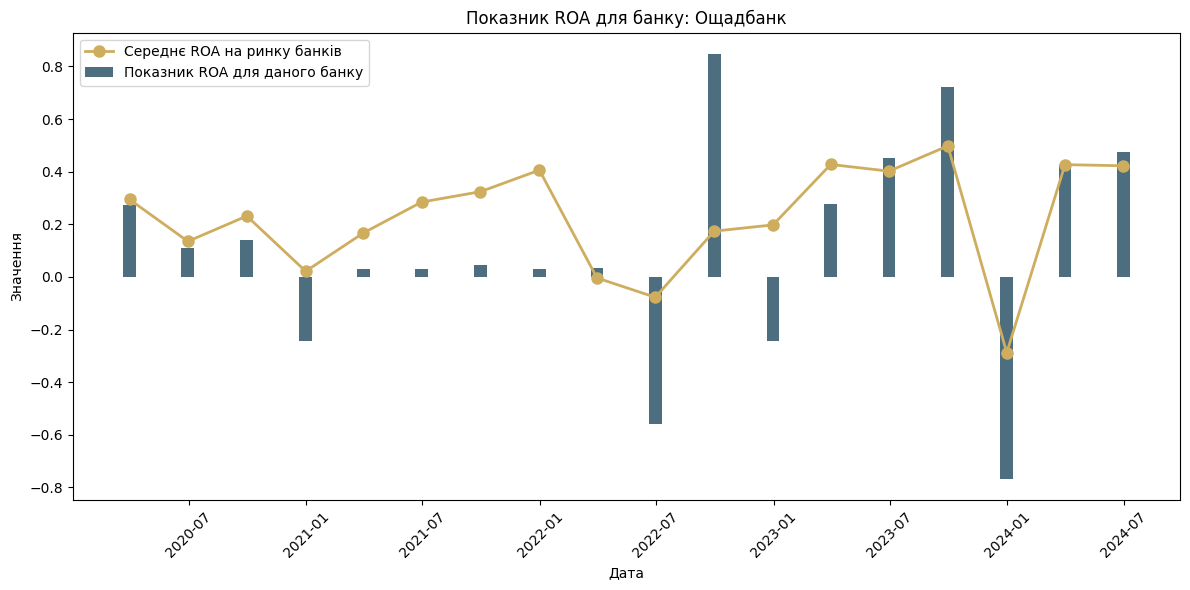

In [243]:
create_hist_roa('Ощадбанк', df_roa_oschadbank, df_roa_total)

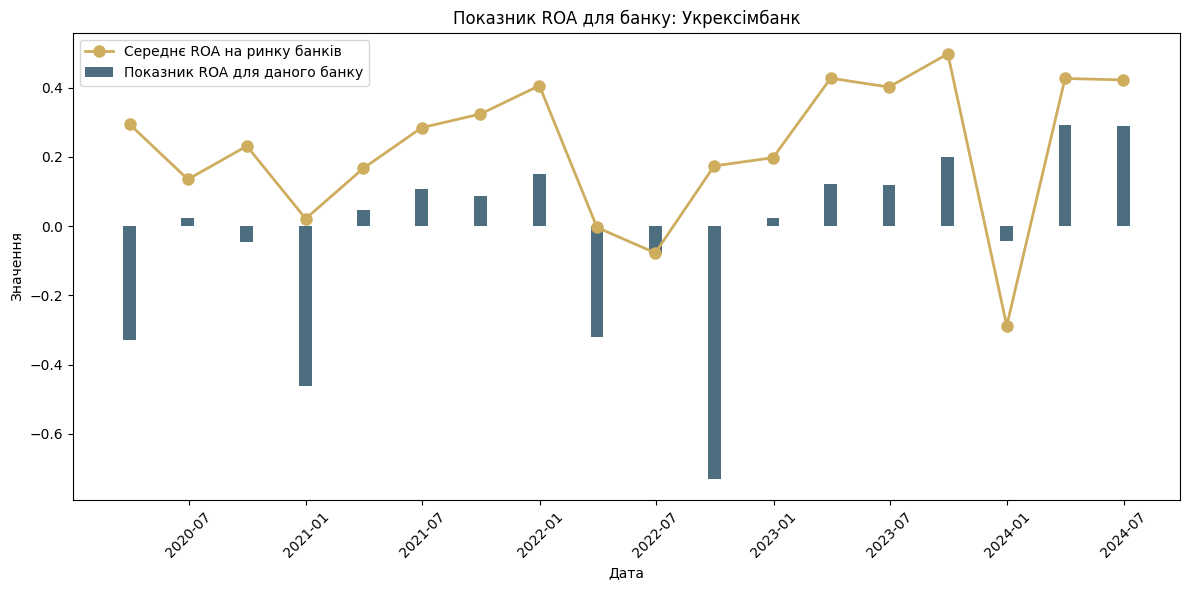

In [244]:
create_hist_roa('Укрексімбанк', df_roa_ukreximbank, df_roa_total)

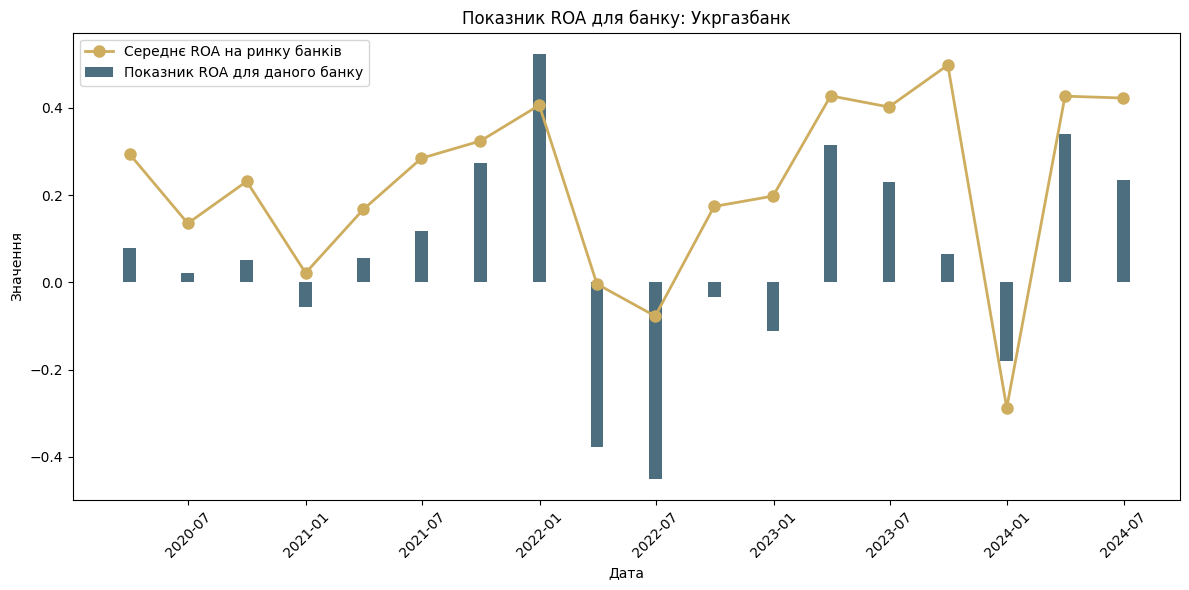

In [245]:
create_hist_roa('Укргазбанк', df_roa_ukrgasbank, df_roa_total)

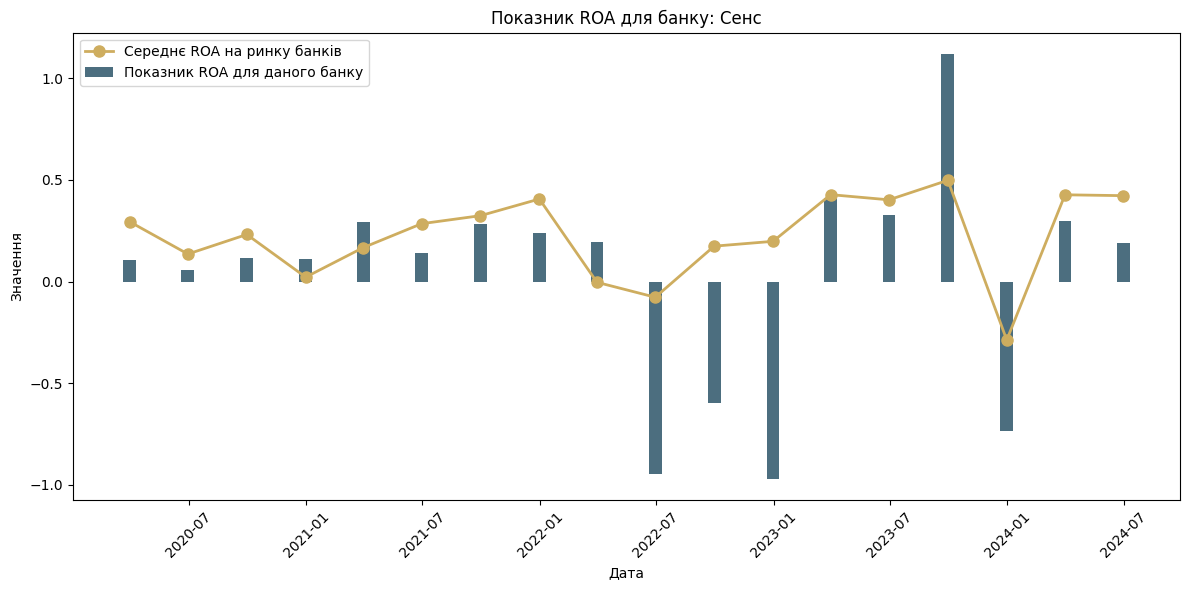

In [246]:
create_hist_roa('Сенс', df_roa_sense, df_roa_total)

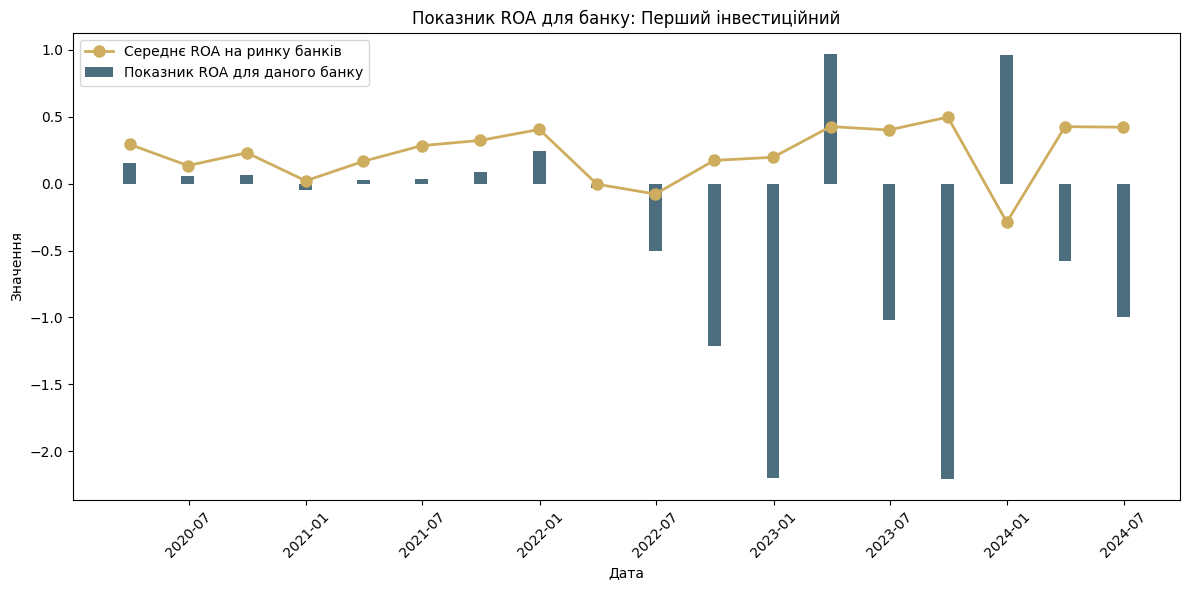

In [247]:
create_hist_roa('Перший інвестиційний', df_roa_first_investment_bank, df_roa_total)

In [248]:
df_roe_privatbank = (df_profit_combined['privatbank'] / df_equity_combined['privatbank']) * 100
df_roe_oschadbank = (df_profit_combined['oschadbank'] / df_equity_combined['oschadbank']) * 100
df_roe_ukreximbank = (df_profit_combined['ukreximbank'] / df_equity_combined['ukreximbank']) * 100
df_roe_ukrgasbank = (df_profit_combined['ukrgasbank'] / df_equity_combined['ukrgasbank']) * 100
df_roe_sense = (df_profit_combined['sense'] / df_equity_combined['sense']) * 100
df_roe_first_investment_bank = (df_profit_combined['first investment bank'] / df_equity_combined['first investment bank']) * 100

In [249]:
def create_hist_roe(bank, df, total_df):
    plt.figure(figsize=(12, 6))
    plt.bar(pd.to_datetime(df.keys()), df.values, width=20, align='center', color='#003049', alpha=0.7, label='Показник ROE для даного банку')
    plt.plot(pd.to_datetime(df.keys()), total_df.values, color='#CEAD5F', marker='o', linestyle='-', linewidth=2, markersize=8, label='Середнє ROE на ринку банків')
    plt.xlabel('Дата')
    plt.ylabel('Значення')
    plt.title(f'Показник ROE для банку: {bank}')
    plt.xticks(rotation=45)
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.show()

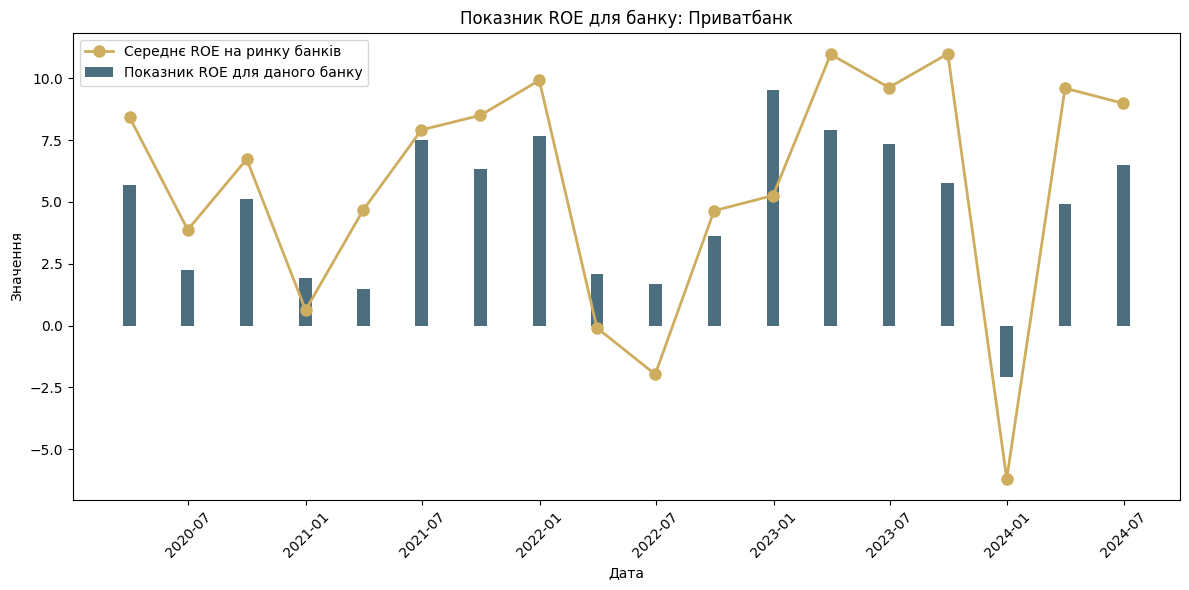

In [250]:
create_hist_roe('Приватбанк', df_roe_privatbank, df_roe_total)

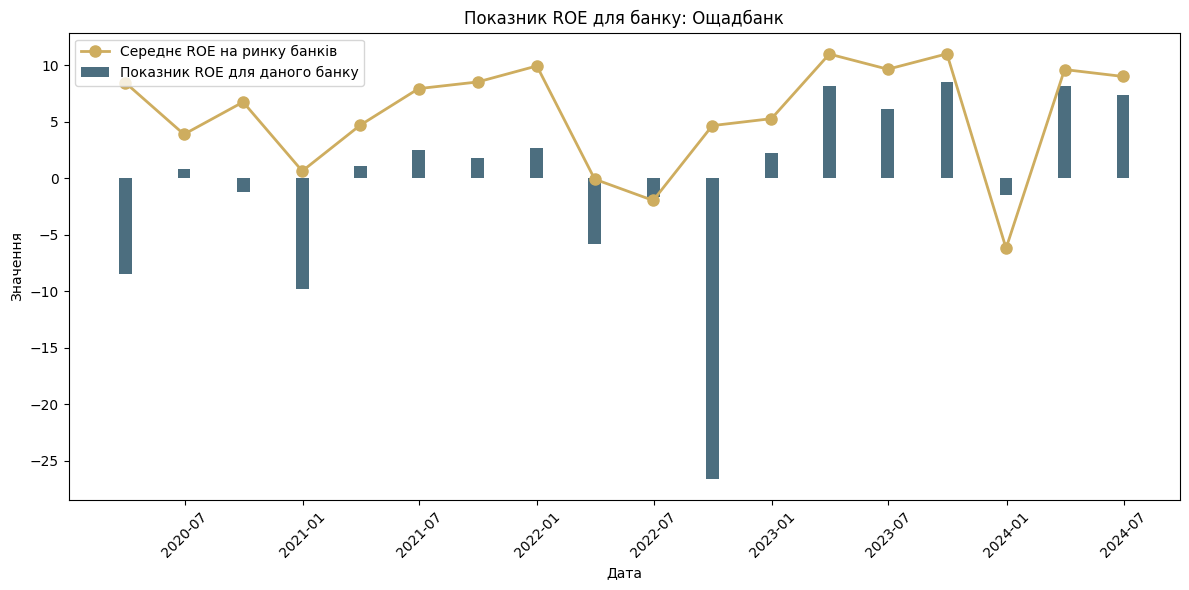

In [251]:
create_hist_roe('Ощадбанк', df_roe_ukreximbank, df_roe_total)

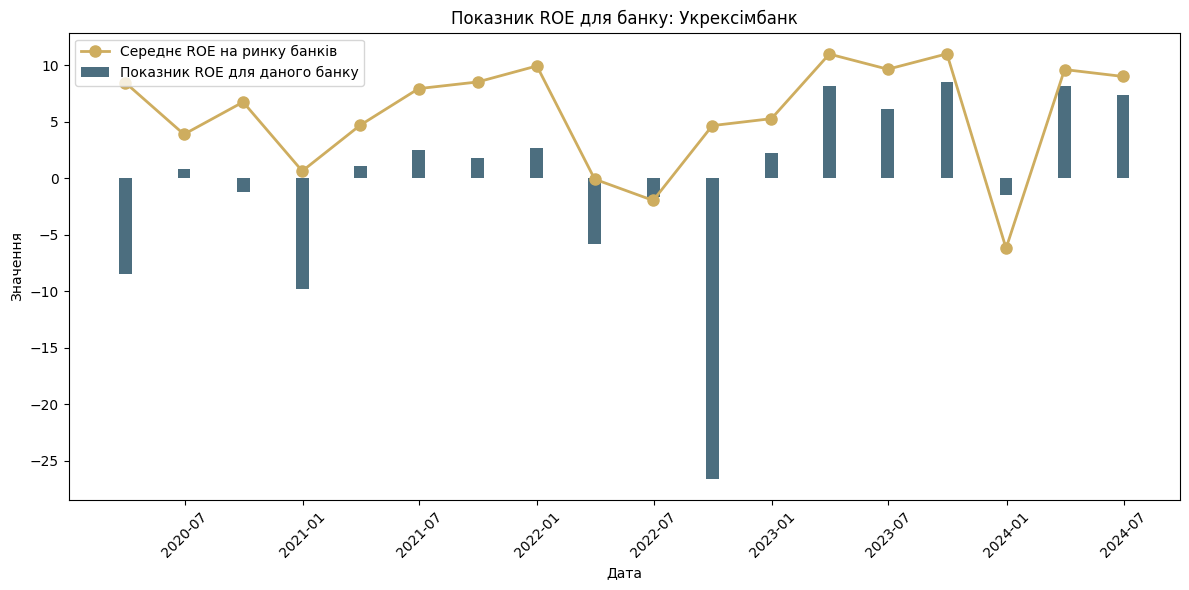

In [252]:
create_hist_roe('Укрексімбанк', df_roe_ukreximbank, df_roe_total)

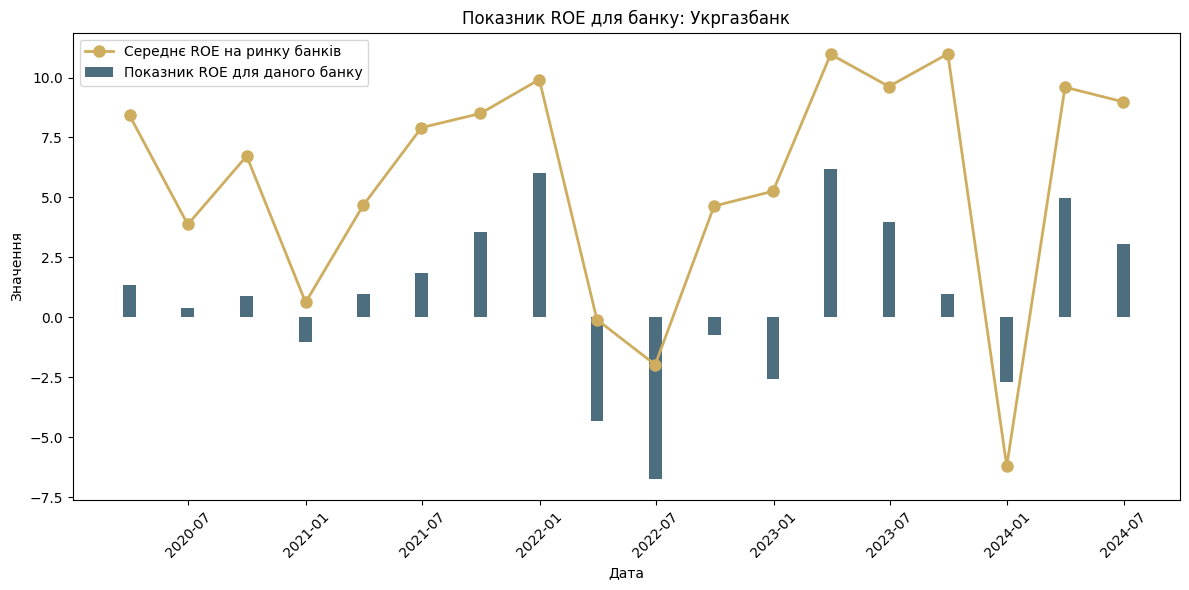

In [253]:
create_hist_roe('Укргазбанк', df_roe_ukrgasbank, df_roe_total)

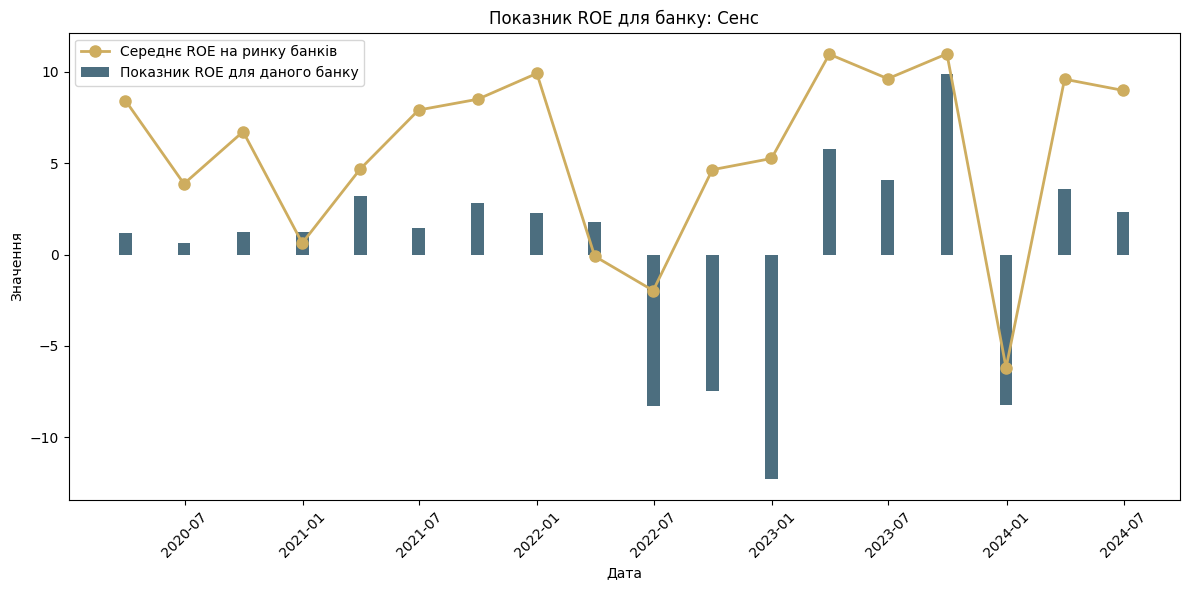

In [254]:
create_hist_roe('Сенс', df_roe_sense, df_roe_total)

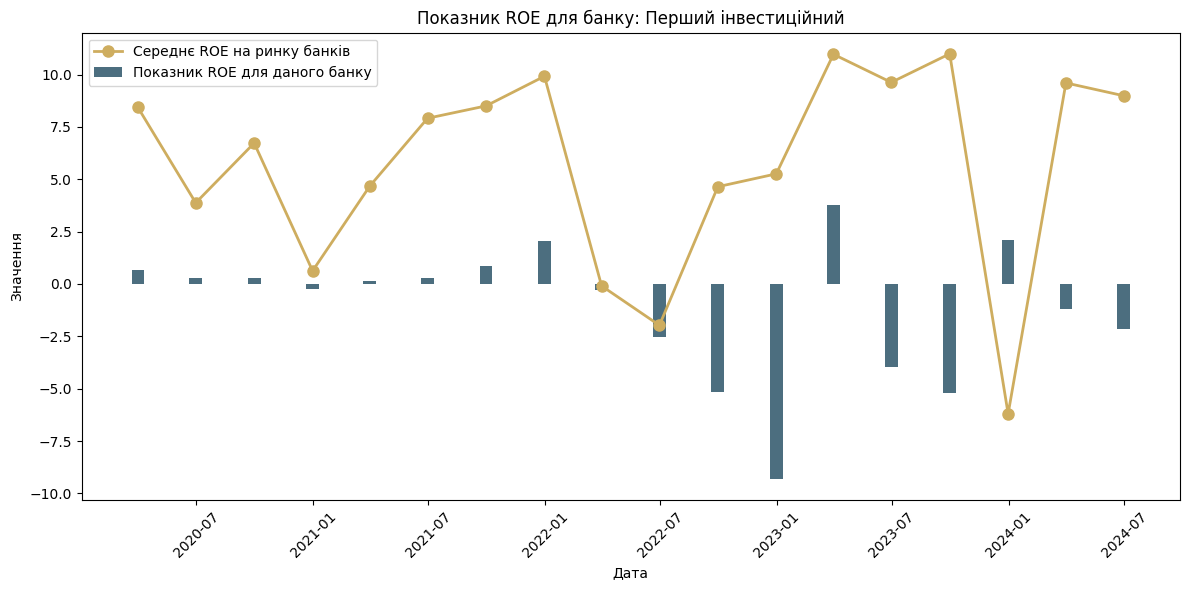

In [255]:
create_hist_roe('Перший інвестиційний', df_roe_first_investment_bank, df_roe_total)